In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from swarm_sim import *

from IPython.display import display

%matplotlib inline 

## Transformation des données en graphe

Import du CSV et mise en forme des données  
Chaque satellite a ses coordonnées sur 3 lignes (coordonnées x, y et z) et chaque colonne indique son déplacement dans le temps

In [70]:
PATH = 'Traces.csv'

df = pd.read_csv(PATH, sep=',', header=None)
satellites = {}

for i in range(0,100):
    sat = df.iloc[3*i : 3*i+3].copy()
    sat['coords'] = ['x','y','z']
    satellites[i] = sat.set_index('coords', drop=True)

#affichage du premier satellite
satellites[0]


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
coords,,,,,,,,,,,,,,,,,,,,,
x,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
y,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
z,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06


Création des graphes en fonction de l'état initial des satellites  
On ajoute un lien entre deux noeuds en fonction de leur distance (trois distances : 20km, 40km, 60km)

In [71]:
RANGE1 = 20000
RANGE2 = 40000
RANGE3 = 60000

list_satellites = []

for i in range(len(satellites)):
    obj_sat = Node.__new__(Node)
    obj_sat.__init__(i, satellites[i][0][0], satellites[i][0][1], satellites[i][0][2])
    list_satellites.append(obj_sat)

swarm = Swarm.__new__(Swarm)
swarm.__init__(RANGE1, list_satellites)
graph1 = swarm.swarm_to_nxgraph()

swarm.__init__(RANGE2, list_satellites)
graph2 = swarm.swarm_to_nxgraph()

swarm.__init__(RANGE3, list_satellites)
graph3 = swarm.swarm_to_nxgraph()


/tmp/ipykernel_20443/3195517332.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj_sat.__init__(i, satellites[i][0][0], satellites[i][0][1], satellites[i][0][2])


## Affichage des graphes obtenus à l'état initial

In [66]:
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
def afficher_graphe(graph):
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.axis("off")
    nx.draw_networkx(graph, pos=nx.random_layout(graph1), ax=ax, **plot_options)

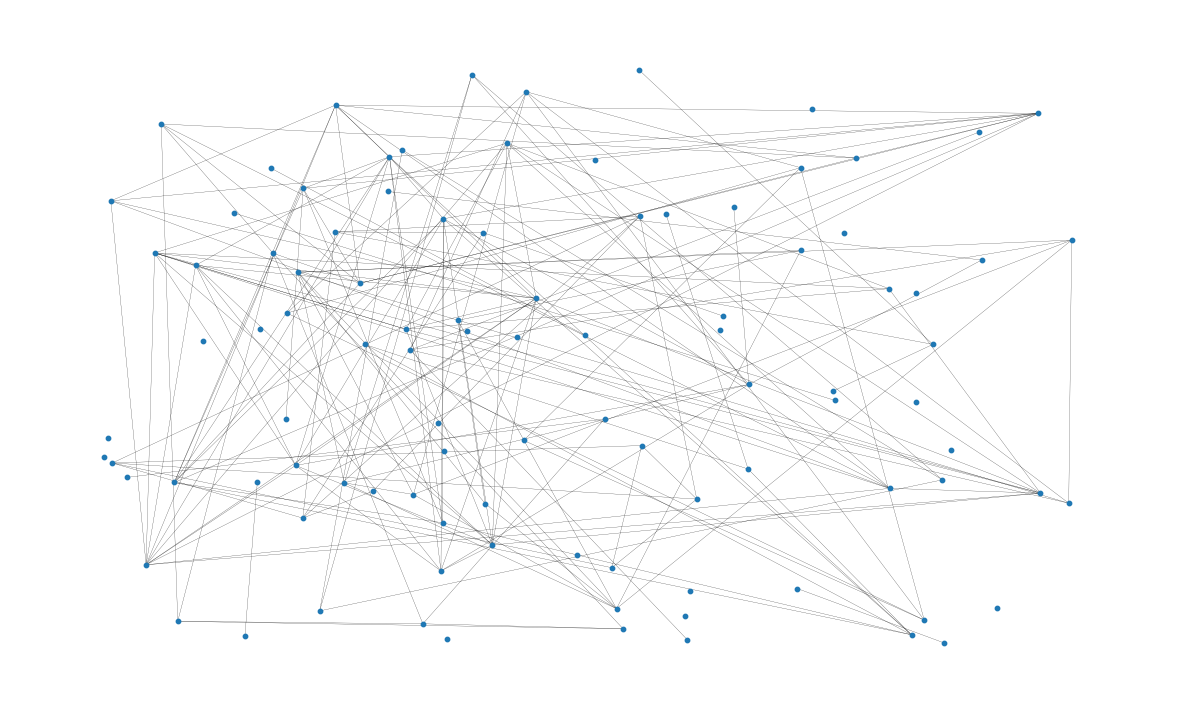

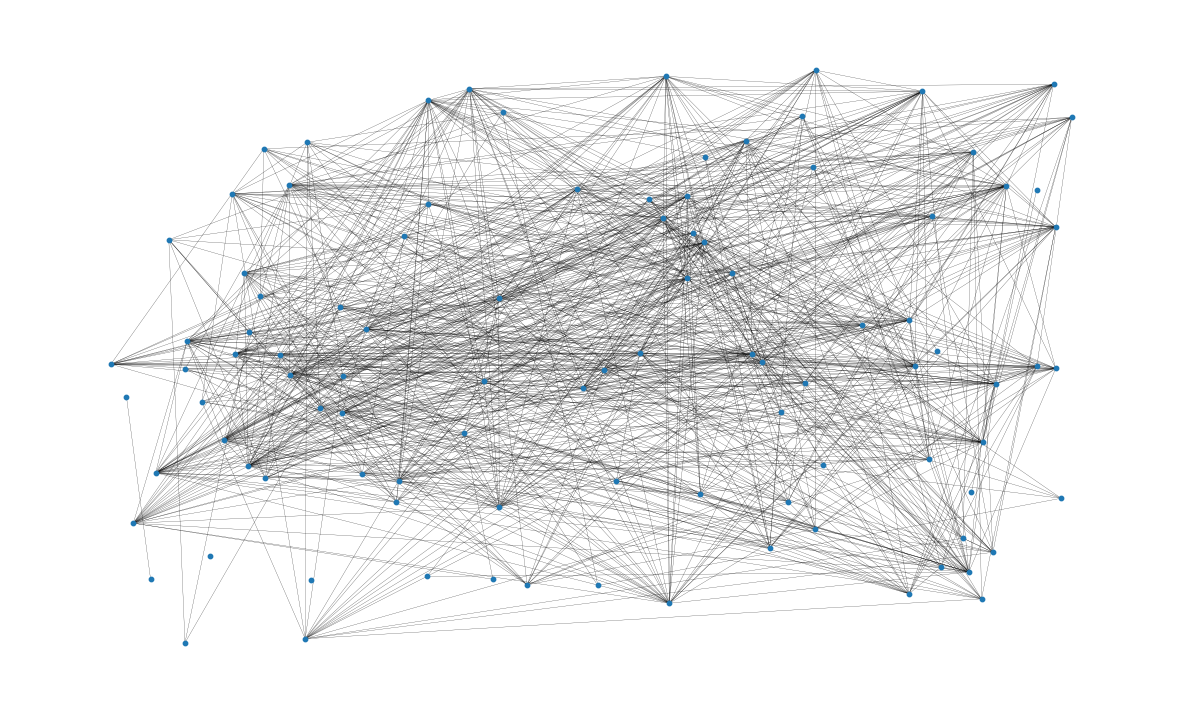

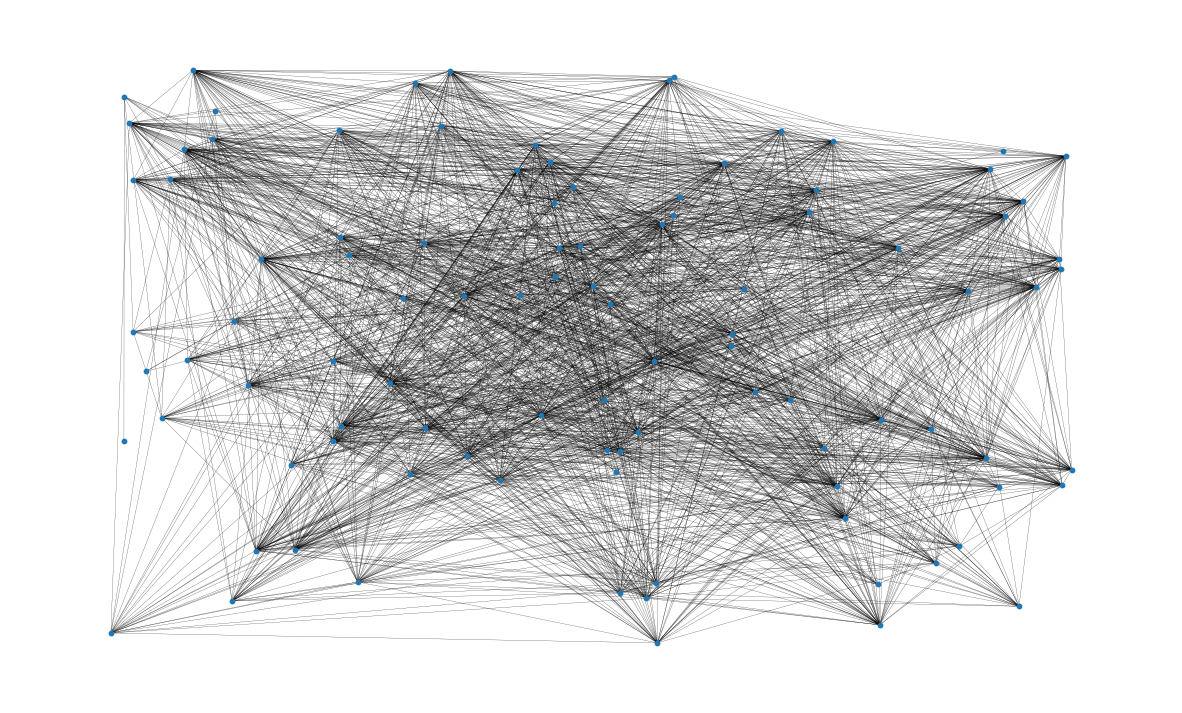

In [67]:
afficher_graphe(graph1)
afficher_graphe(graph2)
afficher_graphe(graph3)

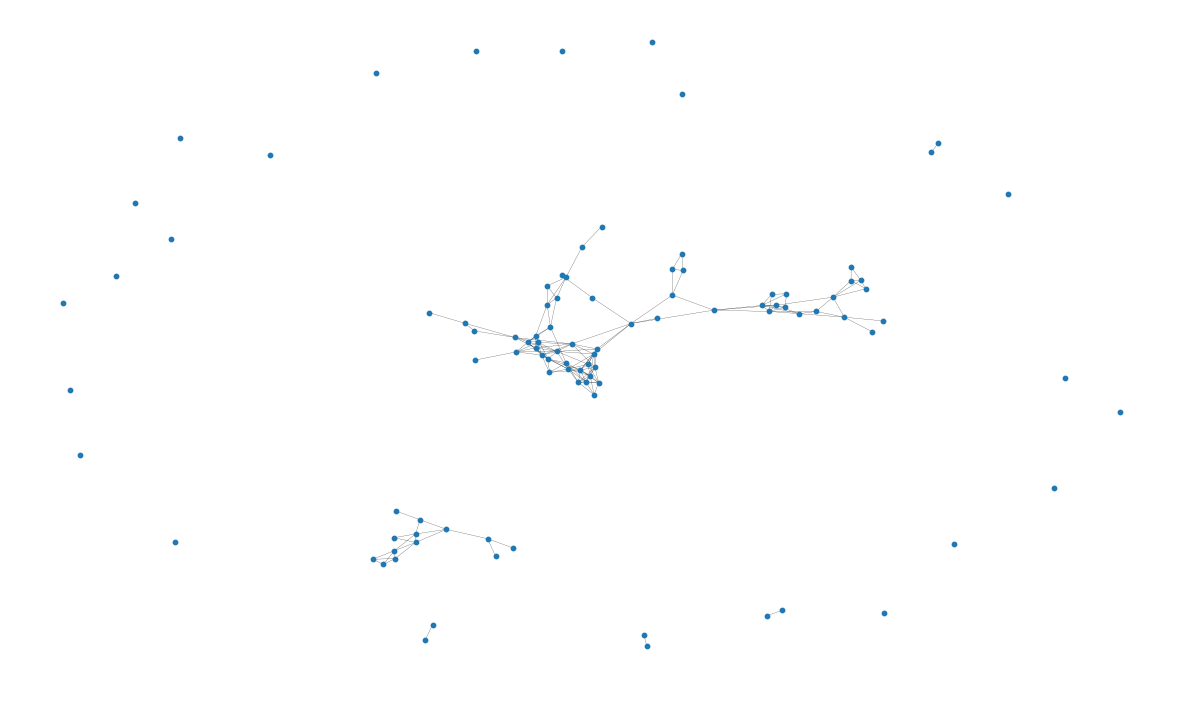

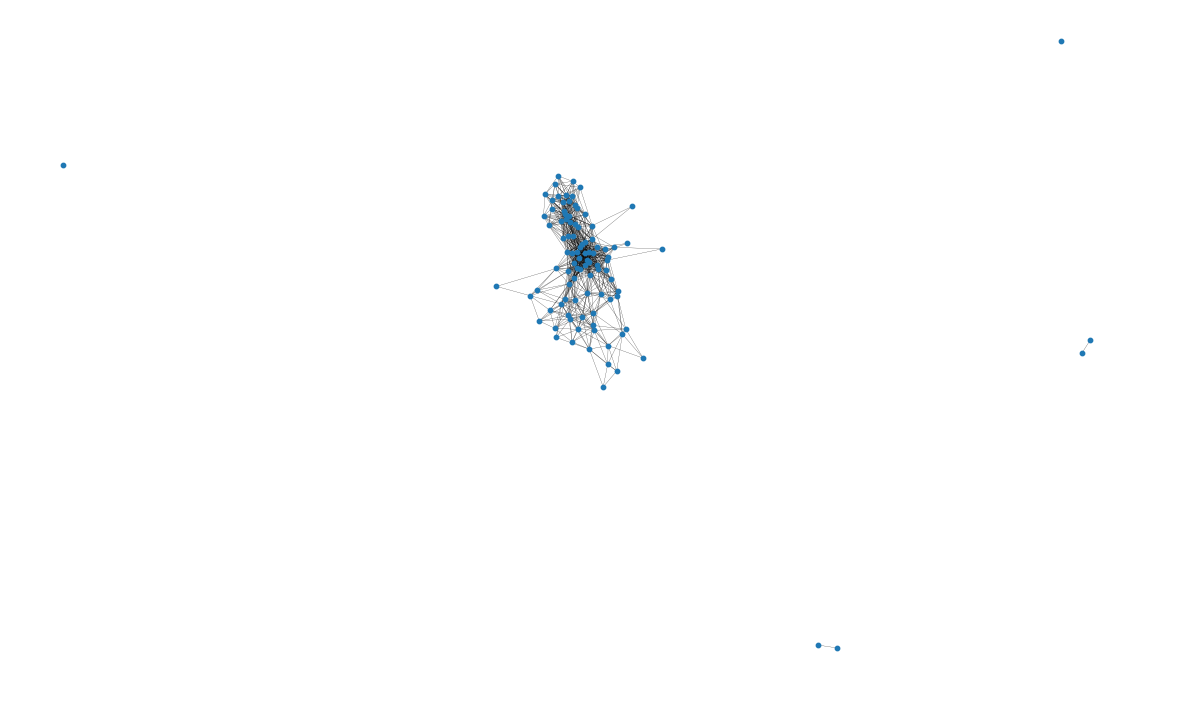

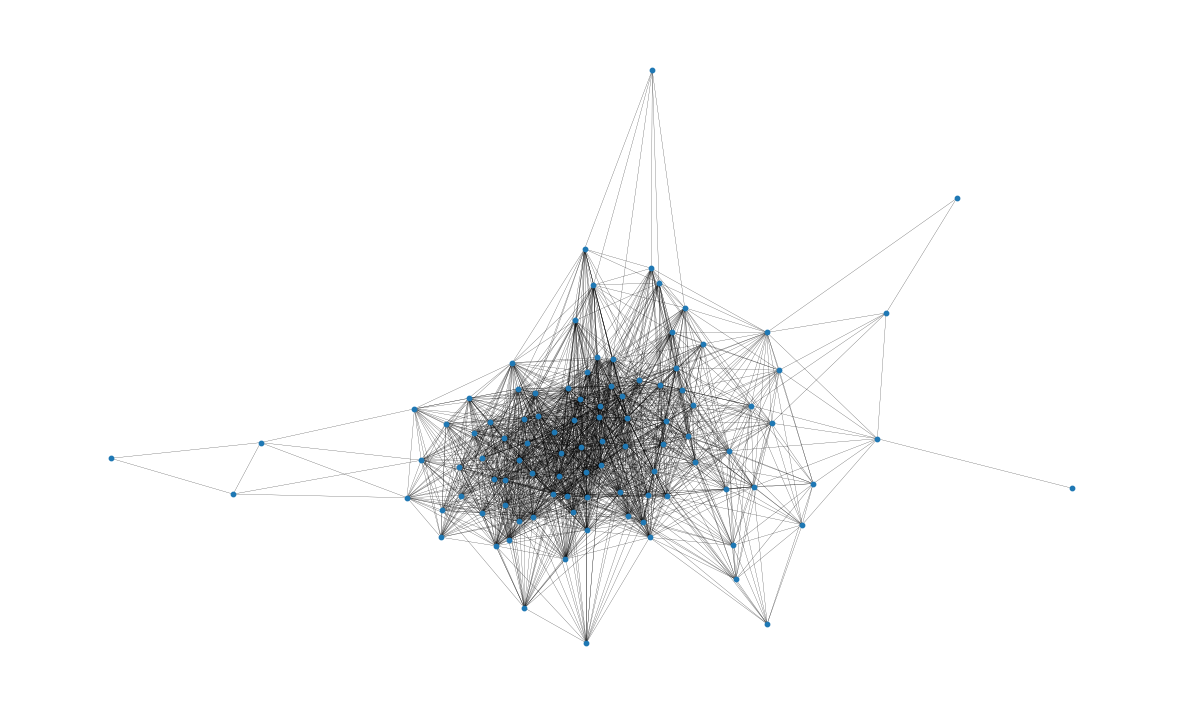

In [72]:
def afficher_graphe_avec_layout(graph):
    pos = nx.spring_layout(graph)
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.axis("off")
    nx.draw_networkx(graph, pos=pos, ax=ax, **plot_options)

afficher_graphe_avec_layout(graph1)
afficher_graphe_avec_layout(graph2)
afficher_graphe_avec_layout(graph3)

## Analyse des graphes à l'état initial

Graphe 1 (20km)

In [75]:
print("Nombre d'arcs ", graph1.number_of_edges())
print("Nombre de noeuds ", graph1.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph1.degree()]))

Nombre d'arcs  174
Nombre de noeuds  100
Degré moyen des noeuds  3.48


Graphe 2 (40km)

In [77]:
print("Nombre d'arcs ", graph2.number_of_edges())
print("Nombre de noeuds ", graph2.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph2.degree()]))

Nombre d'arcs  883
Nombre de noeuds  100
Degré moyen des noeuds  17.66


Graphe 3 (60km)

In [78]:
print("Nombre d'arcs ", graph3.number_of_edges())
print("Nombre de noeuds ", graph3.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph3.degree()]))

Nombre d'arcs  1958
Nombre de noeuds  100
Degré moyen des noeuds  39.16


In [79]:
def afficher_shortest_paths(graph):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))
    df = pd.DataFrame(shortest_paths).fillna("∞") 
    display(df)

afficher_shortest_paths(graph1)
afficher_shortest_paths(graph2)
afficher_shortest_paths(graph3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,5.0,∞,∞,∞,4.0,4.0,3.0,6.0,3.0,...,3.0,∞,∞,∞,4.0,1.0,∞,4.0,∞,∞
19,1.0,4.0,∞,∞,∞,3.0,3.0,2.0,5.0,2.0,...,2.0,∞,∞,∞,3.0,1.0,∞,3.0,∞,∞
95,1.0,5.0,∞,∞,∞,4.0,4.0,3.0,6.0,3.0,...,3.0,∞,∞,∞,4.0,0.0,∞,4.0,∞,∞
70,2.0,3.0,∞,∞,∞,2.0,2.0,2.0,4.0,1.0,...,1.0,∞,∞,∞,3.0,2.0,∞,3.0,∞,∞
73,2.0,4.0,∞,∞,∞,3.0,3.0,1.0,5.0,1.0,...,2.0,∞,∞,∞,2.0,2.0,∞,2.0,∞,∞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
86,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
88,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
93,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,0.0,∞,∞,∞,∞,∞,∞


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,2.0,2.0,∞,2.0,2.0,2.0,1.0,3.0,1.0,...,2.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0
33,1.0,1.0,2.0,∞,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,4.0,4.0,3.0,2.0,1.0,3.0,1.0,3.0,2.0
97,1.0,2.0,2.0,∞,2.0,1.0,2.0,1.0,3.0,1.0,...,1.0,3.0,3.0,3.0,1.0,2.0,2.0,0.0,2.0,2.0
70,1.0,1.0,2.0,∞,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,4.0,4.0,2.0,2.0,1.0,3.0,1.0,3.0,2.0
7,1.0,2.0,2.0,∞,2.0,1.0,2.0,0.0,2.0,1.0,...,1.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,∞,∞,∞,1.0,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
34,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
53,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
85,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,2,1,3,2,1,2,1,2,1,...,1,2,2,2,1,1,2,1,2,2
2,1,2,0,4,2,1,2,1,2,2,...,1,2,2,3,1,1,1,1,1,1
5,1,1,1,3,2,0,1,1,2,1,...,1,2,2,2,1,1,1,1,2,1
7,1,1,1,3,1,1,1,0,1,1,...,1,2,2,2,1,1,2,1,2,2
9,1,1,2,3,1,1,1,1,1,0,...,1,3,2,2,1,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,3,4,2,5,4,3,4,3,4,3,...,3,2,3,5,3,3,2,3,2,2
85,3,3,2,5,4,2,3,3,4,3,...,3,2,3,4,3,3,2,2,1,2
88,3,3,2,5,3,2,3,3,4,3,...,3,1,2,4,2,3,2,2,1,2
86,4,3,5,1,4,4,3,4,3,4,...,4,6,5,2,4,4,5,4,6,5
